# Assignment 1: Fruits with color_KNN model

Submission instructions:

 - Make sure the notebook you submit is cleanly and **fully executed**. 
 - Submit your notebook back in Blackboard where you downloaded this file.
 - Submit your work **as either a .ipynb Python file or a PDF file** on Blackboard.

*Assignment Overview*

- #### Goal:

The objective of this assignment is to apply our understanding of Python and basic machine learning concepts using the "fruit_data_with_colours.csv" dataset. This dataset includes various fruits characterized by features such as mass, width, height, and color score. 

Our goal is to build and evaluate a K-Nearest Neighbors (KNN) model to classify fruits into four categories: **1= apple, 2= mandarin, 3= orange, 4= lemon.**

- #### Assignment Description:

Questions 1-4: Aimed at reviewing and applying the Python skills we learned in our previous 522 course. These questions cover fundamental data analysis steps including exploring the dataset, data visualization, and performing summary statistics. These exercises will help you familiarize yourself with the dataset and prepare for the machine learning model.


Questions 5-6: Focus on building our first machine learning model. The code for these steps is provided. Your task is to understand and explain each step in the process of creating and training a KNN model. This includes data preparation, model creation, training, and evaluation.



#### Import required libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Question 1: Understand the Dataset Structure

After examining the dataset, answer the following questions:
- What are the features in this dataset? List them.
- Which variable is the target variable in this dataset?


In [8]:
df = pd.read_csv("fruit_data_with_colours.csv")
df

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79
5,2,80,5.8,4.3,0.77
6,2,80,5.9,4.3,0.81
7,2,76,5.8,4.0,0.81
8,1,178,7.1,7.8,0.92
9,1,172,7.4,7.0,0.89


### Question 2: Explore the Dataset

In this question, you will write your own code to explore different characteristics of the dataset. Please answer the following questions by writing the appropriate Python code:

- **Check the Sample Size**: Write code to determine how many entries (rows) are in the dataset.

- **Dataset Information**: Use the `.info()` method to get information about the dataset. What insights can you gather about the data types and the presence of null values in each column from this output?


In [22]:
df.shape
print("Sample size:", df.shape[0])

Sample size: 59


In [10]:
df.info

<bound method DataFrame.info of     fruit_label  mass  width  height  color_score
0             1   192    8.4     7.3         0.55
1             1   180    8.0     6.8         0.59
2             1   176    7.4     7.2         0.60
3             2    86    6.2     4.7         0.80
4             2    84    6.0     4.6         0.79
5             2    80    5.8     4.3         0.77
6             2    80    5.9     4.3         0.81
7             2    76    5.8     4.0         0.81
8             1   178    7.1     7.8         0.92
9             1   172    7.4     7.0         0.89
10            1   166    6.9     7.3         0.93
11            1   172    7.1     7.6         0.92
12            1   154    7.0     7.1         0.88
13            1   164    7.3     7.7         0.70
14            1   152    7.6     7.3         0.69
15            1   156    7.7     7.1         0.69
16            1   156    7.6     7.5         0.67
17            1   168    7.5     7.6         0.73
18            1   

### Question 3: Visualize the Data

In this question, use data visualization techniques to explore the dataset further. Please write the Python code for each visualization and provide a brief explanation of your findings.

- **Bar Chart of Fruit Types**: Create a bar chart showing the count of each fruit type (fruit_label) in the dataset. What does this chart tell you about the frequency of different fruits in the dataset?

- **Pair Plot**: Create a pair plot to visualize the relationships between all numerical variables in the dataset. You may choose to use Seaborn, or any other suitable library for this task. What insights can you gather about the relationships between these variables?

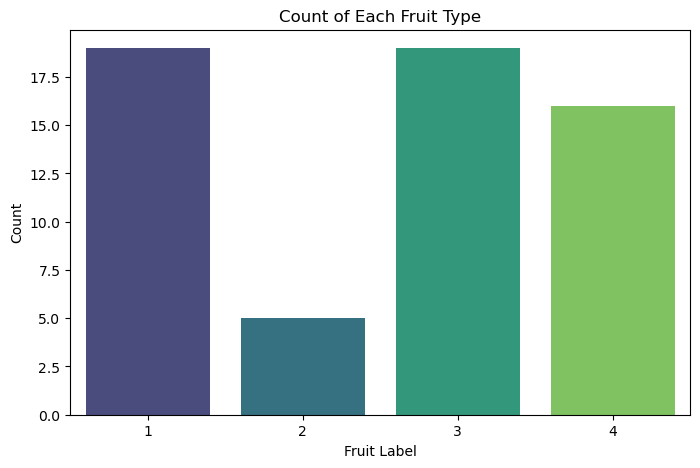

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='fruit_label', palette='viridis')
plt.title('Count of Each Fruit Type')
plt.xlabel('Fruit Label')
plt.ylabel('Count')
plt.show()

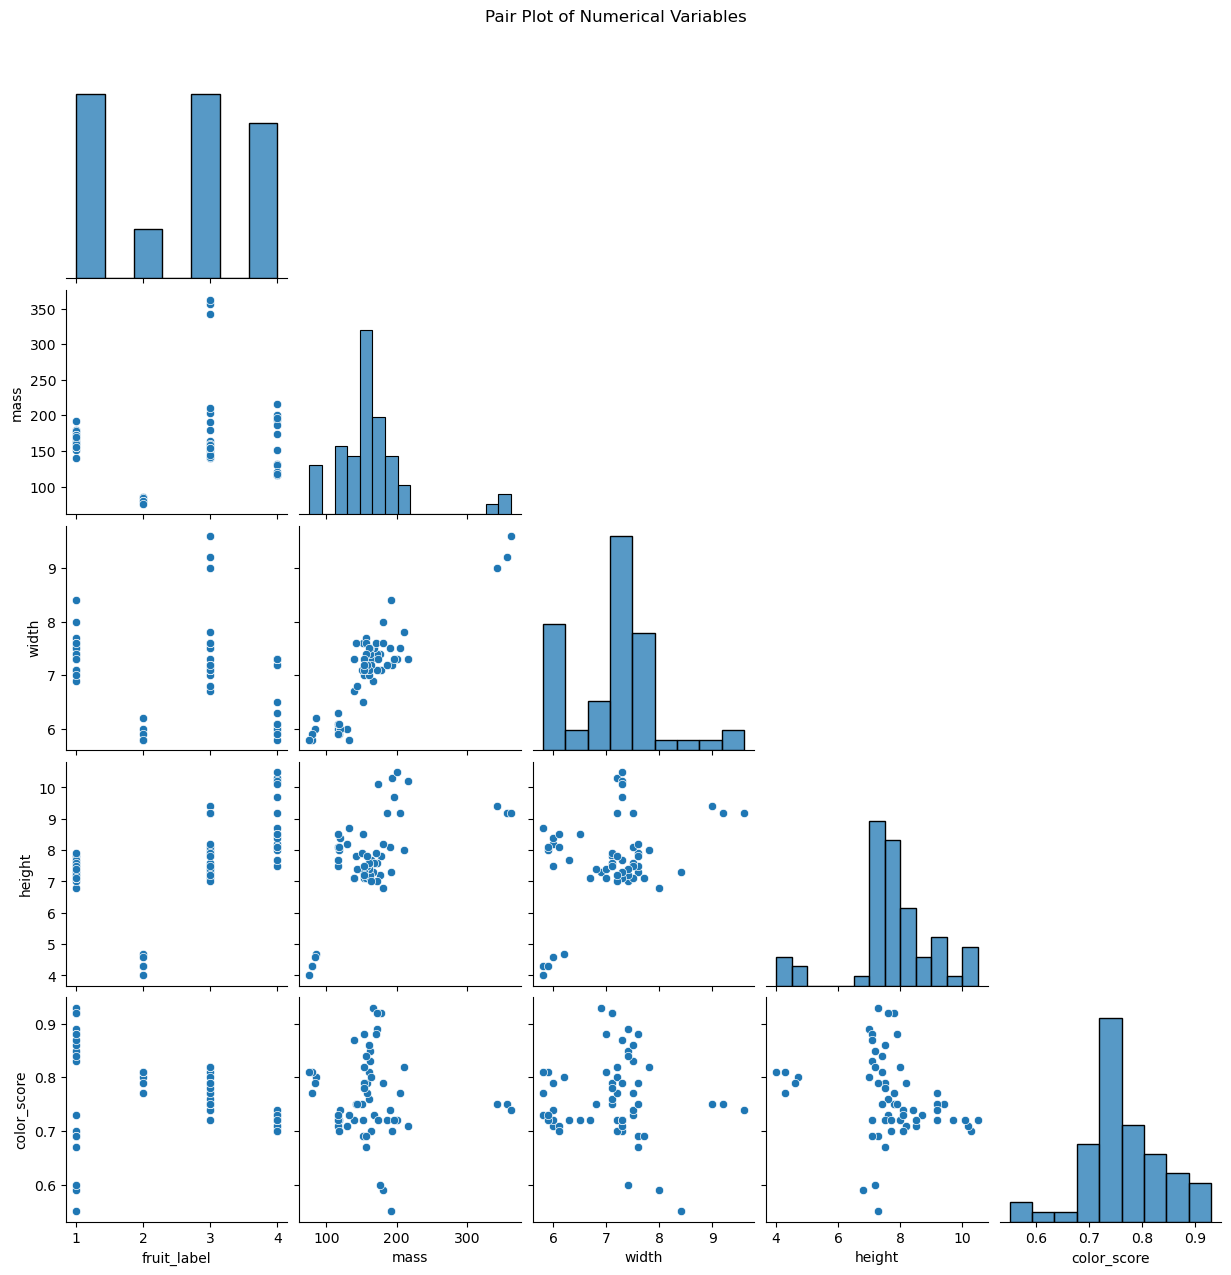

In [28]:
sns.pairplot(df, corner=True)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

### Question 4: Summary Statistics Analysis
Generate the descriptive statistics of the numerical variables in the dataset. 


In [30]:
desc_all = df.describe(include='all')
print(desc_all)

       fruit_label        mass      width     height  color_score
count    59.000000   59.000000  59.000000  59.000000    59.000000
mean      2.542373  163.118644   7.105085   7.693220     0.762881
std       1.208048   55.018832   0.816938   1.361017     0.076857
min       1.000000   76.000000   5.800000   4.000000     0.550000
25%       1.000000  140.000000   6.600000   7.200000     0.720000
50%       3.000000  158.000000   7.200000   7.600000     0.750000
75%       4.000000  177.000000   7.500000   8.200000     0.810000
max       4.000000  362.000000   9.600000  10.500000     0.930000


## Question 5: Building a KNN Model

### Step 1: Data Preparation

In [32]:
# Importing the function for splitting data into train and test sets
from sklearn.model_selection import train_test_split

# Selecting features and target variable
X = df[['mass', 'width', 'height', 'color_score']]
y = df['fruit_label']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


# Printing the shapes of the training and test sets for both features and target
print("Training set shape (features):", X_train.shape)
print("Training set shape (target):", y_train.shape)
print("Test set shape (features):", X_test.shape)
print("Test set shape (target):", y_test.shape)

Training set shape (features): (44, 4)
Training set shape (target): (44,)
Test set shape (features): (15, 4)
Test set shape (target): (15,)


#### Questions:

- What does X represent in this context?
- What does y represent? 
- Explain why we need to split the data into training and test sets.
- What are the roles of `test_size=0.25` and `random_state=0` in this context?
- What do the shapes of `X_train` and `y_train` indicate about the training dataset?
- What do the shapes of `X_test` and `y_test` tell you about the test dataset?

In [ ]:
#What does X represent in this context?  
#the input variables used to predict the target
#What does y represent?
#label and category of each fruit
#Explain why we need to split the data into training and test sets.
#Train the model on one subset (training set) so it can learn patterns.Evaluate its performance on unseen data (test set) to 
#check how well it generalizes.

In [34]:
#What are the roles of test_size=0.25 and random_state=0 in this context?
#test_size=0.25 means 25% of the data is used for testing and 75% for training.
#random_state=0 ensures the split is reproducible 

#What do the shapes of X_train and y_train indicate about the training dataset?
#The training set contains 44 samples (rows).Each sample has 4 features (columns).
#y_train confirms that there are 44 corresponding labels for those samples.

#What do the shapes of X_test and y_test tell you about the test dataset?
#The test set contains 15 samples, each with 4 features.
#There are 15 corresponding labels in y_test.


### Step 2: Creating and Training the KNN Model

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Creating an instance of KNN classifier
knn = KNeighborsClassifier(n_neighbors=1)

# Training the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Questions:

- Is the problem we are addressing with our KNN model a classification or a regression problem? Explain the basis for your determination.
- Describe how the KNN (K-Nearest Neighbors) classifier works. For example: how does the KNN algorithm determine the class of a new data point?

In [ ]:
#It is a classification problem.Classification predicts a category or label.
#The target variable y is fruit_label, which represents discrete categories (e.g., apple = 1, banana = 2...)

In [41]:
#The K-Nearest Neighbors (KNN) algorithm is a instance based learning method. 
# When a new (unseen) data point is given, KNN calculates the distance (usually Euclidean) between this point and all 
#points in the training set.It then identifies the k closest training samples (in your case, k=1, so just the single closest neighbor).
#The class label of the nearest neighbor(s) is used to assign a class to the new data point.

### Step 3: Model Evaluation

In [61]:
# Evaluating the model
accuracy = knn.score(X_test, y_test)
print("Model accuracy on the test set:", accuracy)

Model accuracy on the test set: 0.6


#### Questions:

- Explain the significance of this evaluation step.
- How would you interpret the accuracy score obtained?

In [ ]:
#Explain the significance of this evaluation step: This step measures how well the KNN classifier performs on TEST data.
#Specifically, knn.score(X_test, y_test) calculates the accuracy, which is the proportion of correct predictions made by the model on the test set.
#It's a critical step to assess the generalization performance — whether the model has learned meaningful patterns or just memorized the training data (overfitting).

In [43]:
#How would you interpret the accuracy score obtained?
#The model correctly classified 60% of the test samples.I think this is a moderate performance. 
#The model has some predictive power, but it's far from perfect.

### Question 6: Making Predictions with the KNN Model

Now that we have built our KNN model, let's see how it performs on new data. Consider the following two examples:

- Example 1: A small fruit with mass 18g, width 3.3 cm, height 4.5 cm, and a color score of 0.59.
- Example 2: A larger, elongated fruit with mass 110g, width 7.8 cm, height 9.3 cm, and a color score of 0.71.

Use the code below to predict the type of fruit for each example using our trained KNN model, and observe the results:

In [45]:
# Prediction for the first example
first_example = [18, 3.3, 4.5, 0.59]
first_prediction = knn.predict([first_example])

# Prediction for the second example
second_example = [110, 7.8, 9.3, 0.71]
second_prediction = knn.predict([second_example])

print("Prediction for the first example:", first_prediction)
print("Prediction for the second example:", second_prediction)

Prediction for the first example: [2]
Prediction for the second example: [4]


#### Question:

- What are the model's predictions for the first and second examples? 

In [47]:
# 1= apple, 2= mandarin, 3= orange, 4= lemon.

In [49]:
#The first prediction is 2-mandarin

In [51]:
#The second prediction is 4-lemon